In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

titanic_df=sns.load_dataset("titanic")
df_copy=titanic_df.copy()

In [23]:
print(df_copy.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [2]:
print(titanic_df.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
print(f"shape of dataset:{titanic_df.shape}")

shape of dataset:(891, 15)


In [4]:
print(f"type of dataset:{titanic_df.dtypes}")

type of dataset:survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [5]:
print(f"Statistical details of dataset:{titanic_df.describe()}")

Statistical details of dataset:         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
print(f"Missing value of dataset:{titanic_df.isnull().sum()}")

Missing value of dataset:survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
# Check the shape of the dataset
print(f"Dataset shape: {titanic_df.shape}")

# Check the data types of each column
print("\nData types:\n", titanic_df.dtypes)

# Summary statistics for numerical columns
print("\nSummary Statistics:\n", titanic_df.describe())

# Checking for missing values
print("\nMissing Values:\n", titanic_df.isnull().sum())




Dataset shape: (891, 15)

Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Summary Statistics:
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000  

who
child     49
man       88
woman    205
dtype: int64
who
child     83
man      537
woman    271
Name: survived, dtype: int64
who
child    59.036145
man      16.387337
woman    75.645756
dtype: float64


<Axes: xlabel='None', ylabel='count'>

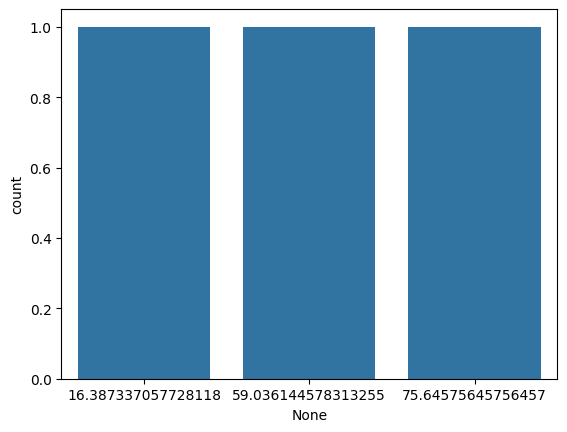

In [8]:
# Group by 'sex' and count total passengers
total_passengers_by_sex = titanic_df.groupby('who')['survived'].count()# Filter the DataFrame for rows where survived == 1
survived_df = titanic_df[titanic_df['survived'] == 1]

# Group by 'sex' and count the number of survivors for each gender
survival_count_by_sex = survived_df.groupby('who').size()

percentage=(survival_count_by_sex/total_passengers_by_sex) * 100
# Display the result
print(survival_count_by_sex)

print(total_passengers_by_sex)

print(percentage)
sns.countplot(x=percentage)

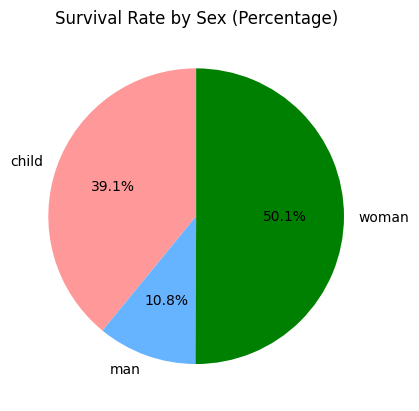

In [24]:
# Example: Pie chart for survival rate by sex
survival_rate_by_sex = titanic_df.groupby('sex')['survived'].mean()

plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','green'])
plt.title('Survival Rate by Sex (Percentage)')
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


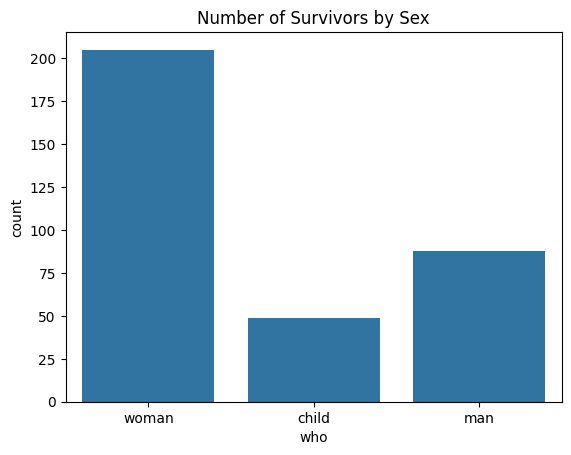

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the number of survivors by sex
sns.countplot(x='who', data=survived_df)
plt.title('Number of Survivors by Sex')
plt.show()


In [11]:
titanic_df_clean=titanic_df.dropna(subset=["age","embarked","deck","embark_town"])
print("\nMissing Values:\n", titanic_df_clean.isnull().sum())


Missing Values:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [12]:
print(titanic_df_clean)

     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1           1       1  female  38.0      1      0  71.2833        C  First   
3           1       1  female  35.0      1      0  53.1000        S  First   
6           0       1    male  54.0      0      0  51.8625        S  First   
10          1       3  female   4.0      1      1  16.7000        S  Third   
11          1       1  female  58.0      0      0  26.5500        S  First   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
871         1       1  female  47.0      1      1  52.5542        S  First   
872         0       1    male  33.0      0      0   5.0000        S  First   
879         1       1  female  56.0      0      1  83.1583        C  First   
887         1       1  female  19.0      0      0  30.0000        S  First   
889         1       1    male  26.0      0      0  30.0000        C  First   

       who  adult_male deck  embark_town alive  alone  
1    wo

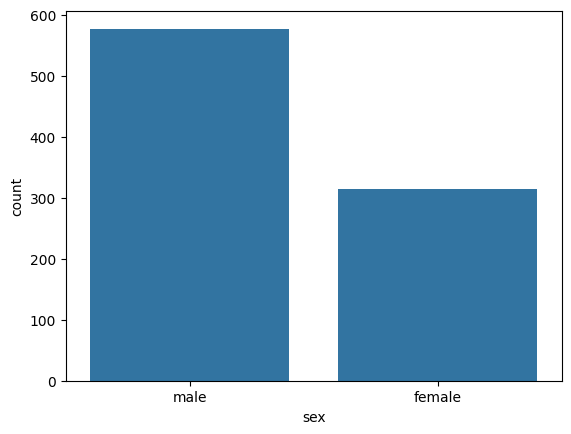

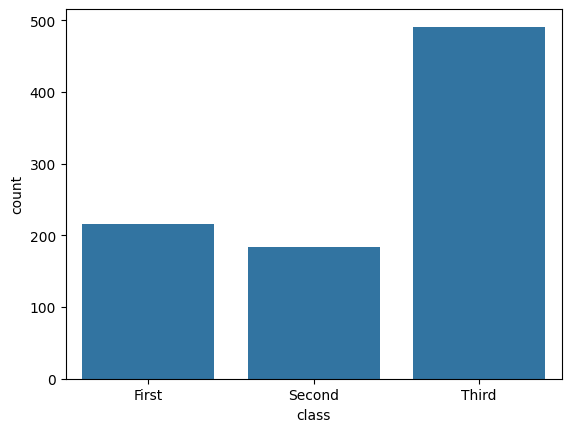

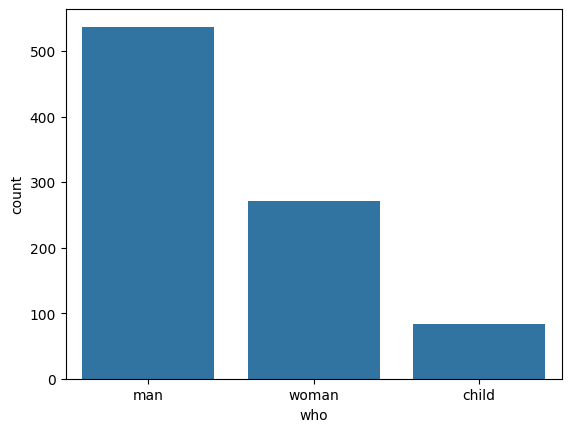

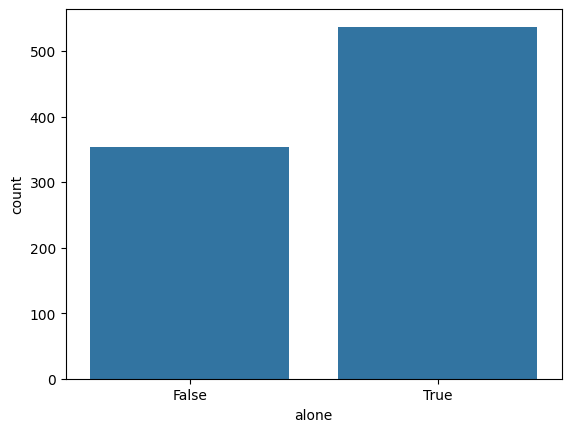

In [13]:
import seaborn as sns
sns.countplot(x="sex",data=titanic_df)
plt.show()

sns.countplot(x="class",data=titanic_df)
plt.show()

sns.countplot(x="who",data=titanic_df)
plt.show()

sns.countplot(x="alone",data=titanic_df)
plt.show()

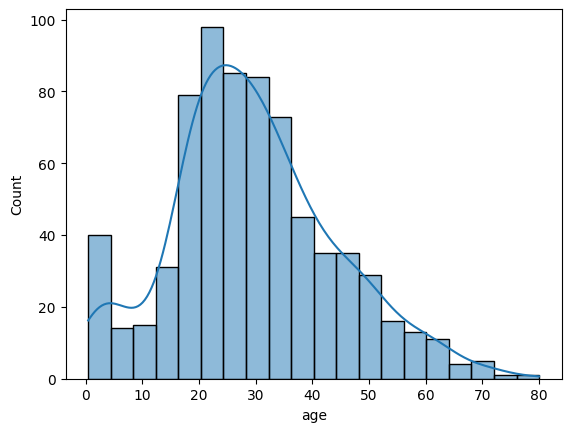

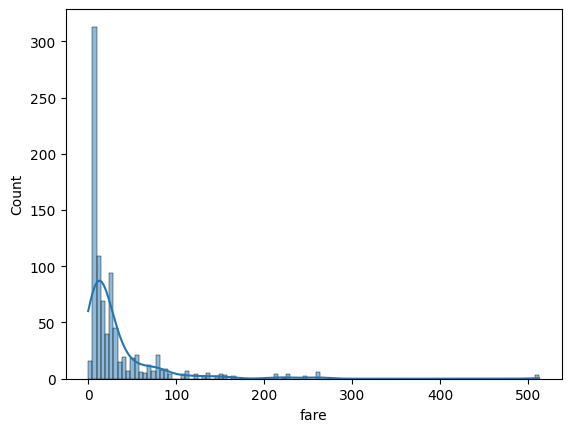

In [14]:
sns.histplot(titanic_df["age"].dropna(),kde=True)
plt.show()
sns.histplot(titanic_df["fare"].dropna(),kde=True)
plt.show()

<Axes: xlabel='pclass', ylabel='age'>

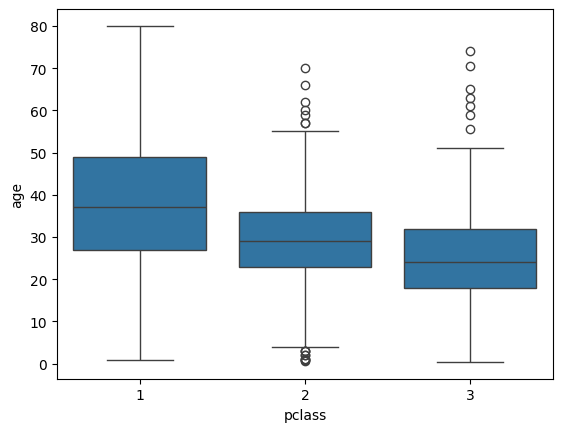

In [15]:
sns.boxplot(x="pclass",y="age",data=titanic_df)

<Axes: xlabel='fare'>

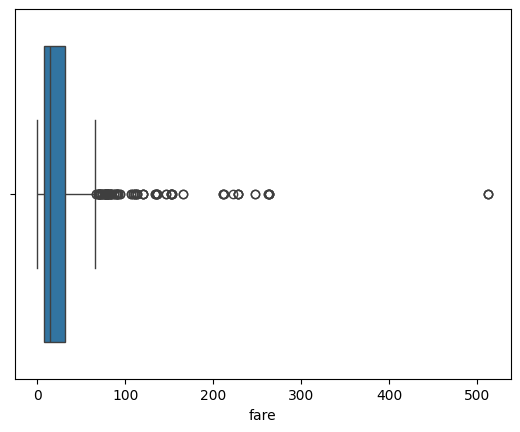

In [16]:
sns.boxplot(x="fare",data=titanic_df)

In [17]:
cross_tab=pd.crosstab(titanic_df["sex"],titanic_df["class"])

In [18]:
print(cross_tab)

class   First  Second  Third
sex                         
female     94      76    144
male      122     108    347


In [20]:
print(titanic_df[['age','pclass']])

      age  pclass
0    22.0       3
1    38.0       1
2    26.0       3
3    35.0       1
4    35.0       3
..    ...     ...
886  27.0       2
887  19.0       1
888   NaN       3
889  26.0       1
890  32.0       3

[891 rows x 2 columns]


<Axes: xlabel='class', ylabel='sex'>

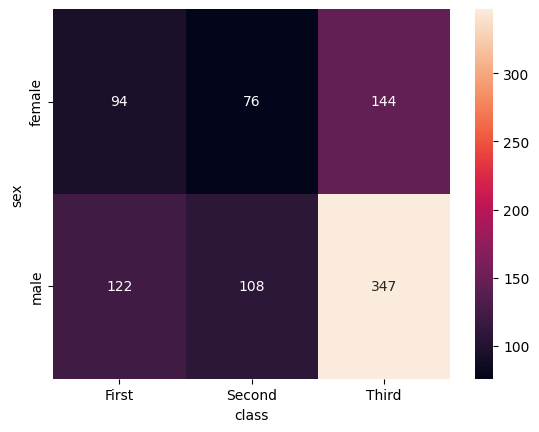

In [26]:
sns.heatmap(cross_tab,annot=True,fmt='d')

survived    0    1
alone             
False     175  179
True      374  163


<Axes: xlabel='survived', ylabel='alone'>

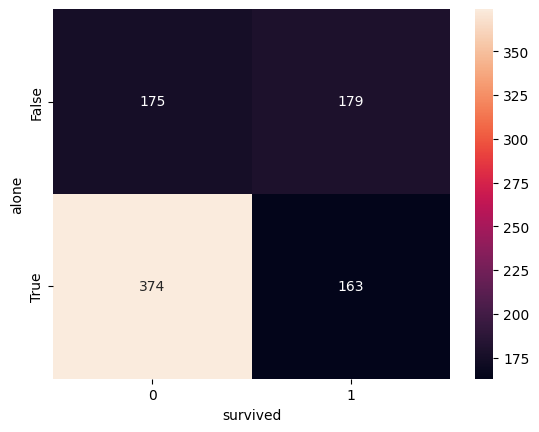

In [27]:
cross_tab=pd.crosstab(titanic_df["alone"],titanic_df["survived"])
print(cross_tab)
sns.heatmap(cross_tab,annot=True,fmt='d')

<Axes: xlabel='age', ylabel='fare'>

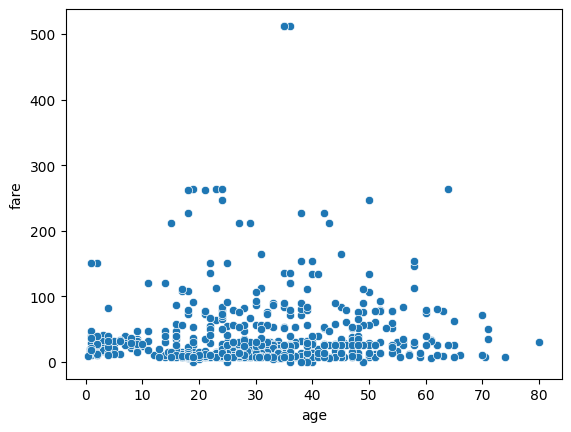

In [28]:
sns.scatterplot(x="age",y="fare",data=titanic_df)

In [ ]:

correlation_matrix = titanic_df[[ 'fare', 'age']].corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Box plot of 'age' by 'class'
sns.boxplot(x='class', y='age', data=titanic_df)
plt.show()

# Violin plot of 'fare' by 'sex'
sns.violinplot(x='sex', y='fare', data=titanic_df)
plt.show()


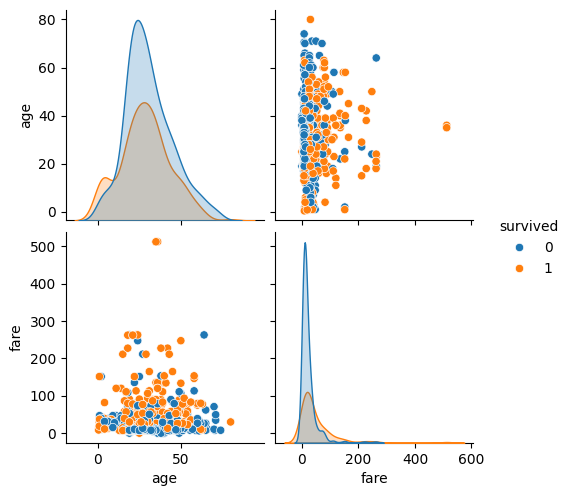

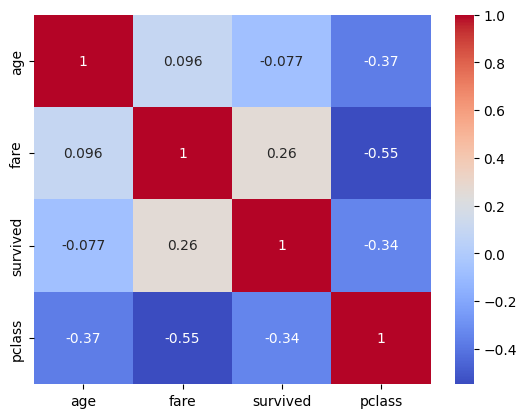

In [29]:
# Pair plot
sns.pairplot(titanic_df[['age', 'fare', 'survived']], hue='survived')
plt.show()

# Heatmap of correlation with more variables
sns.heatmap(titanic_df[['age', 'fare', 'survived', 'pclass']].corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Create a new feature 'family_size'
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch'] + 1

# Create a new feature 'is_alone'
titanic_df['is_alone'] = np.where(titanic_df['family_size'] == 1, 1, 0)


In [30]:
# Group by 'sex' and count the survivors
survival_count_by_sex = titanic_df.groupby('sex')['survived'].sum()
print(survival_count_by_sex)


sex
female    233
male      109
Name: survived, dtype: int64


In [ ]:
print(titanic_df)

In [ ]:
# Countplot for survival by both class and gender
sns.catplot(x='pclass', hue='sex', col='survived', data=titanic_df, kind='count', height=4, aspect=1)
plt.show()

# Calculate survival rate by class and gender
class_gender_survival = titanic_df.pivot_table('survived', index='sex', columns='pclass', aggfunc='mean') * 100
print(f"Survival Rate by Class and Gender:\n{class_gender_survival}")


In [ ]:
# Violin plot for survival by age, class, and gender
sns.violinplot(x='pclass', y='age', hue='survived', data=titanic_df, split=True)
plt.title('Survival by Age and Class')
plt.show()

In [ ]:
# Boxplot of survival based on fare
sns.boxplot(x='survived', y='fare', data=titanic_df)
plt.title('Survival by Fare')
plt.show()

# Calculate mean fare of survivors vs. non-survivors
fare_survival = titanic_df.groupby('survived')['fare'].mean()
print(f"Mean Fare of Survivors and Non-Survivors:\n{fare_survival}")

In [ ]:
# Age distribution of survivors vs. non-survivors
sns.histplot(data=titanic_df, x='age', hue='survived', multiple='stack', kde=True)
plt.title('Survival by Age')
plt.show()

# Calculate mean age of survivors vs. non-survivors
age_survival = titanic_df.groupby('survived')['age'].mean()
print(f"Mean Age of Survivors and Non-Survivors:\n{age_survival}")


In [ ]:
# Countplot for survival by passenger class
sns.countplot(x='pclass', hue='survived', data=titanic_df)
plt.title('Survival by Passenger Class')
plt.show()

# Calculate survival rate by class
class_survival = titanic_df.groupby('pclass')['survived'].mean() * 100
print(f"Survival Rate by Passenger Class:\n{class_survival}")
